In [103]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


np.random.seed(3)

train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.5,
    zoom_range=[0.8, 2.0],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

train_generator = train_data_generator.flow_from_directory(
    directory='./handwriting_shape_plus/train',
    target_size=(24,24),
    batch_size=6,
    class_mode='categorical'
)

test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory(
    directory='./handwriting_shape_plus/hard_test/',
    target_size=(24,24),
    batch_size=6,
    class_mode='categorical'
)

Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


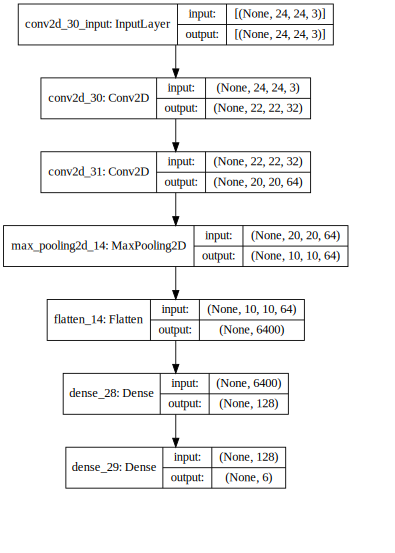

In [104]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

model = Sequential()
model.add(
    Conv2D(32,kernel_size=(3, 3),
           activation='relu',input_shape=(24,24,3))
)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

# 모델 가시화
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=64).create(prog='dot', format='svg'))

In [108]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#TODO 데이터를 부풀렸음에도 불구하고 steps_per_epoch 값이 증가 불가
hist = model.fit_generator(
    train_generator,
    epochs=200,
    validation_data=test_generator,
)

Epoch 1/200
15/15 [==============================] - 1s 26ms/step - loss: 0.2146 - accuracy: 0.9621 - val_loss: 4.7047 - val_accuracy: 0.7333
Epoch 2/200
15/15 [==============================] - 0s 21ms/step - loss: 0.0937 - accuracy: 0.9817 - val_loss: 4.4185 - val_accuracy: 0.7333
Epoch 3/200
15/15 [==============================] - 0s 34ms/step - loss: 0.0484 - accuracy: 1.0000 - val_loss: 4.2039 - val_accuracy: 0.7333

In [106]:
print("-- Evaluate --")
scores = model.evaluate(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
5/5 [==============================] - 0s 4ms/step - loss: 3.7273 - accuracy: 0.7333
accuracy: 73.33%


In [107]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

print(test_generator.filenames)

-- Predict --
{'circle': 0, 'question': 1, 'rectangle': 2, 'triangle': 3, 'v': 4, 'x': 5}
[[0.000 0.000 1.000 0.000 0.000 0.000]
 [0.999 0.000 0.001 0.000 0.000 0.000]
 [0.000 0.852 0.000 0.127 0.000 0.020]
 [0.000 0.000 1.000 0.000 0.000 0.000]
 [0.000 0.995 0.000 0.002 0.000 0.004]
 [0.002 0.036 0.000 0.001 0.960 0.001]
 [0.000 0.000 1.000 0.000 0.000 0.000]
 [0.000 0.978 0.003 0.019 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000]
 [0.000 0.000 0.000 0.000 0.000 1.000]
 [0.000 0.000 1.000 0.000 0.000 0.000]
 [0.000 0.000 1.000 0.000 0.000 0.000]
 [0.000 0.000 1.000 0.000 0.000 0.000]
 [0.000 0.000 1.000 0.000 0.000 0.000]
 [0.000 1.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.001 0.999]
 [0.000 0.983 0.004 0.013 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 1.000]
 [0.000 0.000 1.000 0.000 0.000 0.000]
 [0.000 0.001 0.000 0.003 0.001 0.995]
 [0.000 0.000 0.000 0.000 1.000 0.000]
 [0.000 0.000 0.000 0.000 1.000 0.000]
 [0.000 0.000 0.000 0.000 1.000 0.000]
 [0.000 0.000

/Users/hwookim/docs/Univ/2021-1/AI/keras-practice/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
